In [1]:
!pip install pandas numpy yfinance matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 1.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as norm
import warnings
warnings.filterwarnings("ignore")

In [75]:
data = yf.download('NVDA')

[*********************100%***********************]  1 of 1 completed


In [25]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-08-04,180.000000,180.199997,174.520004,175.160004,148174600
2025-08-05,178.259995,180.259995,175.899994,179.619995,156407600
2025-08-06,179.419998,179.899994,176.250000,176.330002,137192300
2025-08-07,180.770004,183.880005,178.800003,181.570007,151878400
2025-08-08,182.699997,183.300003,180.399994,181.550003,123396700


In [95]:
data = yf.download('NVDA', start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [97]:
data['Returns']= data['Close'].pct_change()

In [99]:
data.head()

Price,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2020-01-02,5.971746,5.971746,5.892343,5.942872,237536000,NaN
2020-01-03,5.876163,5.919972,5.827126,5.852018,205384000,-0.016006
2020-01-06,5.900806,5.906034,5.756684,5.782820,262636000,0.004194
2020-01-07,5.972244,6.018044,5.884127,5.929181,314856000,0.012106
2020-01-08,5.983446,6.024766,5.927938,5.968013,277108000,0.001876


In [55]:
num_simulations = 10000
num_days = 22

last_price = data['Close'].iloc[-1]

simulation_df = np.zeros((num_days, num_simulations))

mu = data['Returns'].mean()
sigma = data['Returns'].std()

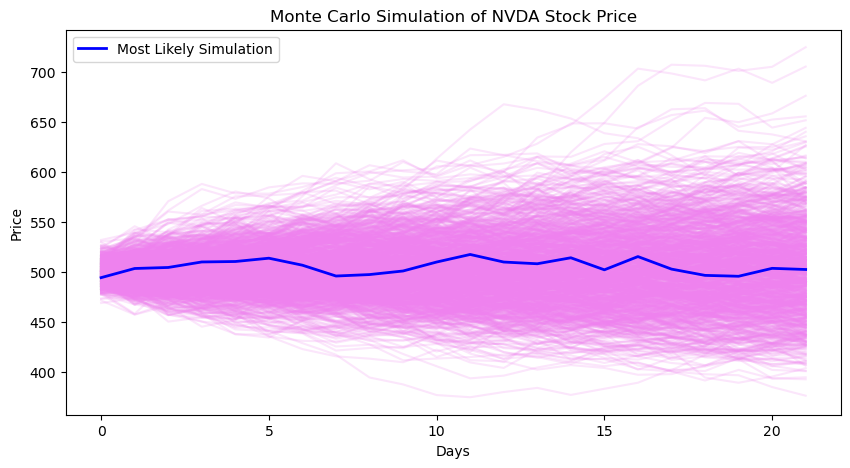

In [101]:
# Parameters
num_simulations = 1000
num_days = 22
last_price = 500  # starting stock price
mu = 0.0005       # expected return (daily drift)
sigma = 0.02      # volatility (daily std dev)

# Initialize simulation matrix
simulation_df = np.zeros((num_days, num_simulations))

for simulation in range(num_simulations):
    price_list = [last_price]
    
    for d in range(num_days):
        # Correct GBM formula
        price = price_list[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
        price_list.append(price)
    
    # Now assign once per simulation (not inside the inner loop!)
    simulation_df[:, simulation] = price_list[1:]

# Final prices
final_prices = simulation_df[-1]

# Median final price
median_final_price = np.median(final_prices)

# Most likely simulation (closest to median)
most_likely_simulation_index = np.argmin(np.abs(final_prices - median_final_price))
most_likely_simulation = simulation_df[:, most_likely_simulation_index]

# Plot
plt.figure(figsize=(10,5))
plt.plot(simulation_df, alpha=0.2, color="violet")
plt.plot(most_likely_simulation, color="blue", linewidth=2, label="Most Likely Simulation")
plt.title('Monte Carlo Simulation of NVDA Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [103]:
print(f"The most likely simulation's final price is:{most_likely_simulation[-1]}")

The most likely simulation's final price is:502.32240208061256


In [105]:
data.tail()

Price,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2022-12-23,15.192495,15.325377,14.869782,15.182504,349326000,-0.008671
2022-12-27,14.108458,15.086588,14.043515,15.060611,464902000,-0.071354
2022-12-28,14.023536,14.249335,13.871670,13.914632,351066000,-0.006019
2022-12-29,14.590032,14.669961,14.214366,14.389211,354923000,0.040396
2022-12-30,14.601022,14.616008,14.220360,14.321270,310490000,0.000753
